# TOXIC MUSHROOM PREDICTION

## Introduction:
This is the mushroom dataset which includes 8124 lines of data (all non-null) about mushrooms' characteristic and wether it was toxic or not. This is my weekly assignment from Facebook & Coder School training courses.

## Dataset:
The dataset has 5 rows and 23 columns, 8124 lines non-null. Unforturnately I could not find back the link of this dataset. But I remembered it was from Kaggle

## Objective
I used imported libraries (mostly from Sklearn) to build an KNN model. Though KNN is easy to understand, honnestly I have never build the model by writing the algorithms code. But I will try to rebuild it in the future.

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
mushrooms=pd.read_csv(r'C:\Users\Asus\Downloads\mushrooms.csv')

In [28]:
mushrooms.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [29]:
mushrooms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
class                       8124 non-null object
cap-shape                   8124 non-null object
cap-surface                 8124 non-null object
cap-color                   8124 non-null object
bruises                     8124 non-null object
odor                        8124 non-null object
gill-attachment             8124 non-null object
gill-spacing                8124 non-null object
gill-size                   8124 non-null object
gill-color                  8124 non-null object
stalk-shape                 8124 non-null object
stalk-root                  8124 non-null object
stalk-surface-above-ring    8124 non-null object
stalk-surface-below-ring    8124 non-null object
stalk-color-above-ring      8124 non-null object
stalk-color-below-ring      8124 non-null object
veil-type                   8124 non-null object
veil-color                  8124 non-null object
ring-number


Attribute Information:

1. cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s 
2. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s 
3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y 
4. bruises?: bruises=t,no=f 
5. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s 
6. gill-attachment: attached=a,descending=d,free=f,notched=n 
7. gill-spacing: close=c,crowded=w,distant=d 
8. gill-size: broad=b,narrow=n 
9. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y 
10. stalk-shape: enlarging=e,tapering=t 
11. stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=? 
12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s 
13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s 
14. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y 
15. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y 
16. veil-type: partial=p,universal=u 
17. veil-color: brown=n,orange=o,white=w,yellow=y 
18. ring-number: none=n,one=o,two=t 
19. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z 
20. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y 
21. population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y 
22. habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d

# PREPROCESSING

In [30]:
#cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y. 
#Rewrite it to its true meanning:
mush=[]
for i in mushrooms['cap-color']:
    if i=='n':
        mush.append('brown')
    if i=='b':
        mush.append('buff')
    if i=='c':
        mush.append('cinnamon')
    if i=='g':
        mush.append('gray')
    if i=='r':
        mush.append('green')
    if i=='p':
        mush.append('pink')
    if i=='u':
        mush.append('purple')
    if i=='e':
        mush.append('red')
    if i=='w':
        mush.append('white')
    if i=='y':
        mush.append('yellow')

In [31]:
mushrooms['cap-color']=mush

In [32]:
mushrooms.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,brown,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,yellow,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,white,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,white,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,gray,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [33]:
#or:
#dictmush={brown:n,buff:b,cinnamon:c,gray:g,green:r, pink:p,purple:u,red:e,white:w,yellow:y}
#Rewrite the odor to its true meanning. But not as the lines above, I reversed a dict to apply the change

In [34]:
dictodor={'almond':'a','anise':'l','creosote':'c','fishy':'y','foul':'f', 'musty':'m','none':'n','pungent':'p','spicy':'s'}
reverseodor=dict((v,k) for (k,v) in dictodor.items())

In [35]:
mushrooms['odor']=mushrooms['odor'].replace(reverseodor)

In [36]:
mushrooms.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,brown,t,pungent,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,yellow,t,almond,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,white,t,anise,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,white,t,pungent,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,gray,f,none,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


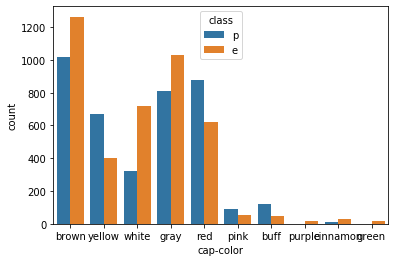

In [38]:
#plotted the chart. Class "p" is poisonous, class "e" is eatable. This I was trying to find the correlation between class and its color
sns.countplot(x='cap-color',data=mushrooms, hue='class')

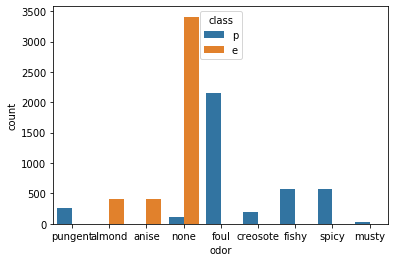

In [39]:
#tried to find the correlation between odor and class:
sns.countplot(x='odor',data=mushrooms, hue='class')

In [40]:
#change the name of class from "p" and "e" to 1 and 0 to train the model
dictclass={'p':1,'e':0}
mushrooms['class']=mushrooms['class'].replace(dictclass)
y=mushrooms['class']
x=mushrooms.drop(columns=['class'])

In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(x,y, test_size=0.3, random_state=101)

In [42]:
X_train.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
2173,x,y,gray,t,none,f,c,b,n,t,...,s,g,w,p,w,o,p,k,v,d
1483,x,s,brown,f,none,f,w,b,k,t,...,s,w,w,p,w,o,e,k,a,g
7994,x,s,brown,f,none,a,c,b,y,e,...,s,o,o,p,n,o,p,o,c,l
3174,x,f,pink,f,creosote,f,w,n,g,e,...,s,w,w,p,w,o,p,k,v,d
387,x,s,brown,f,none,f,w,b,n,t,...,s,w,w,p,w,o,e,k,a,g


# MODELING

In [18]:
#preprocess, from words to digits
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier

In [43]:
#Define Model:
steps=[]# include steps that need to solve
steps.append(['encode',OneHotEncoder()]) #encode all the words 
steps.append(['estimator',KNeighborsClassifier(n_neighbors=7)]) #the n_neighbor represented the number of neighbors that the centre will took

In [44]:
#BCN
pipe_knn=Pipeline(steps)

In [45]:
pipe_knn.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('encode',
                 OneHotEncoder(categorical_features=None, categories=None,
                               drop=None, dtype=<class 'numpy.float64'>,
                               handle_unknown='error', n_values=None,
                               sparse=True)),
                ['estimator',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=7, p=2,
                                      weights='uniform')]],
         verbose=False)

In [46]:
y_pred=pipe_knn.predict(X_test)

In [47]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

1.0

# Comments
The accuracy seemed so weird haha. I guest it was because the types in this dataset were absolutely divided. 

By the way, this was an easy dataset so the accuracy may not be as high like that when applied it to other harder dataset.